# Spatial processing: A Convolution Introduction

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Mean Filter

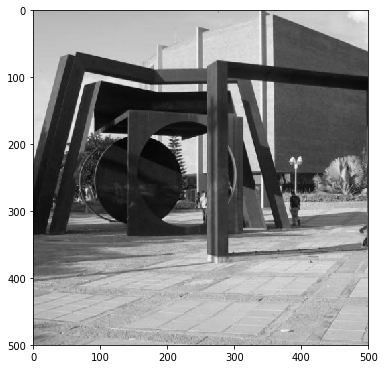

In [2]:
img = cv.imread('../imgs/u.png', 0)

plt.figure(figsize=(6,11))
plt.imshow(img, cmap='gray');

Now, we go to implement the mean kearnel and convolve the image ...
- Change the image size, what happened?

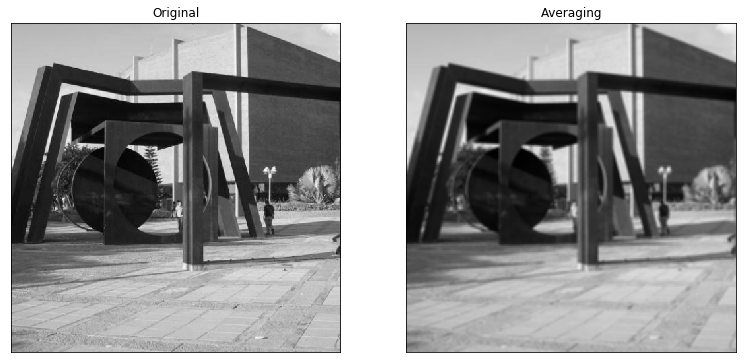

In [3]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

plt.figure(figsize=(13,18))
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In opencv this operation is implemented by default in the blurring method
- Which is the difference?

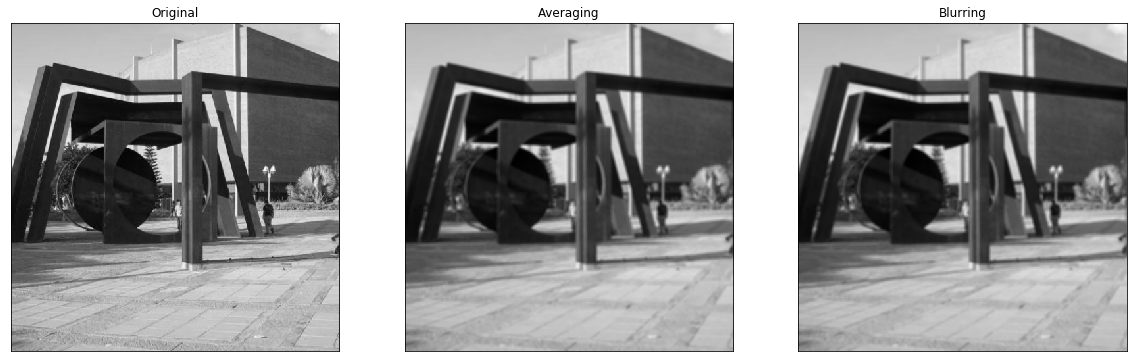

In [4]:
blur = cv.blur(img,(5,5))

plt.figure(figsize=(20,25))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst, cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur, cmap='gray'),plt.title('Blurring')
plt.xticks([]), plt.yticks([])
plt.show()

# Gaussian Filter

- Implement also the filter by hand!

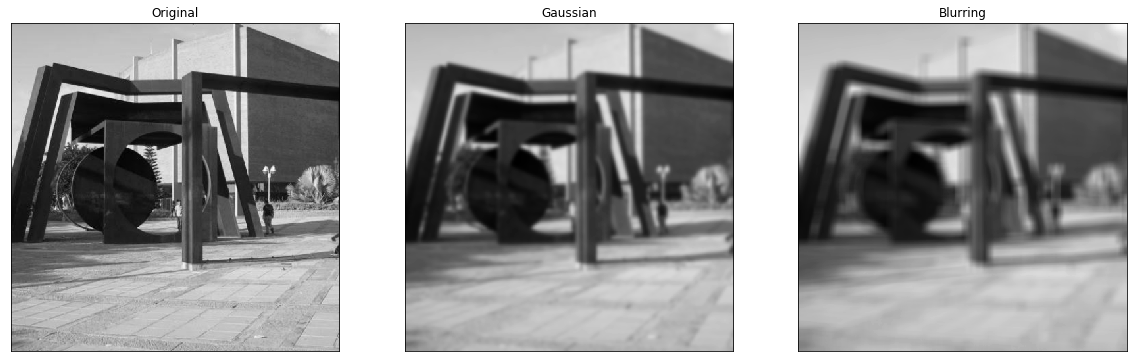

In [5]:
size_kernel = 15
Gaussian = cv.GaussianBlur(img,(size_kernel,size_kernel),0)
blur = cv.blur(img,(size_kernel,size_kernel))

plt.figure(figsize=(20,25))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(Gaussian, cmap='gray'),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur, cmap='gray'),plt.title('Blurring')
plt.xticks([]), plt.yticks([])
plt.show()

# Derivative Filters

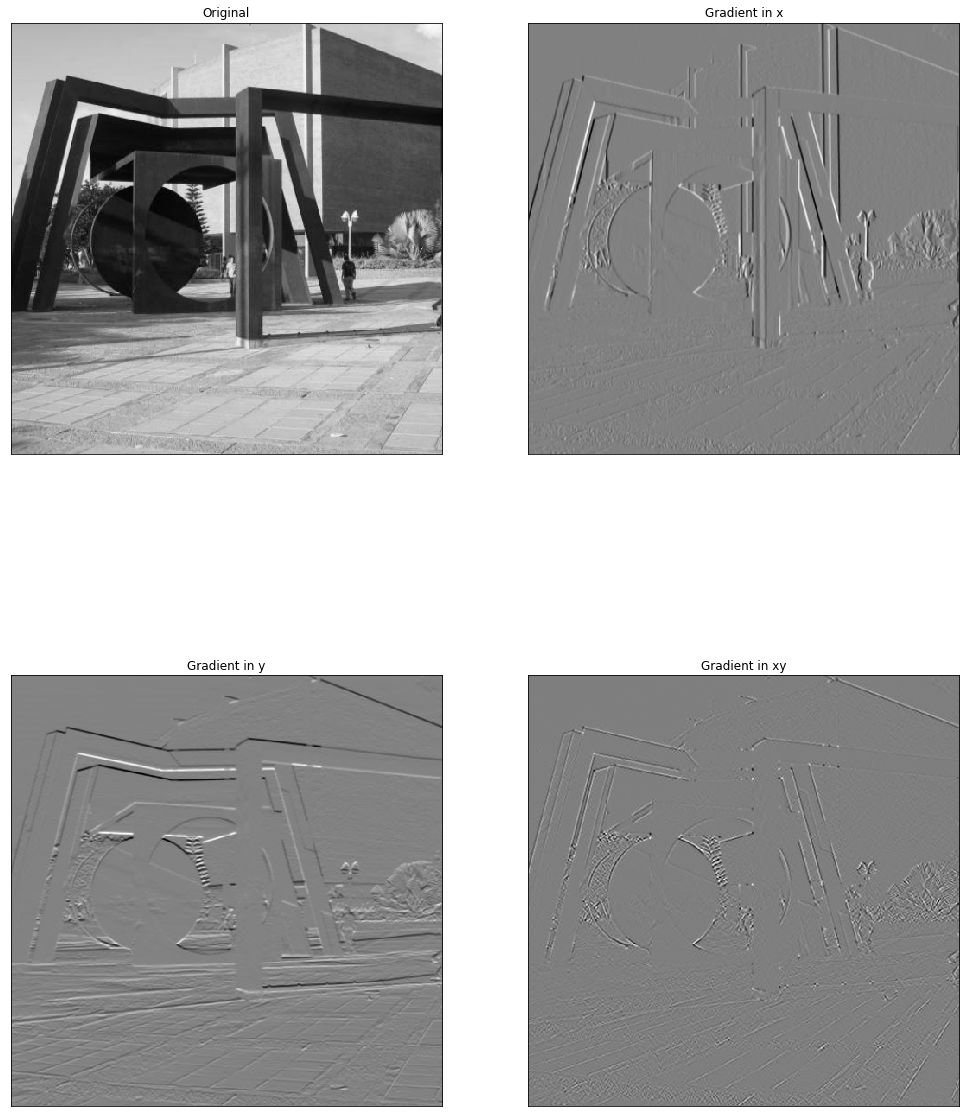

In [6]:
ddepth = cv.CV_16S
scale = 1
delta = 0
grad_x = cv.Sobel(img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_xy = cv.Sobel(img, ddepth, 1, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
plt.figure(figsize=(17,22))
plt.subplot(221),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(grad_x, cmap='gray'),plt.title('Gradient in x')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(grad_y, cmap='gray'),plt.title('Gradient in y')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(grad_xy, cmap='gray'),plt.title('Gradient in xy')
plt.xticks([]), plt.yticks([])
plt.show()    

Why they are in grayscale??

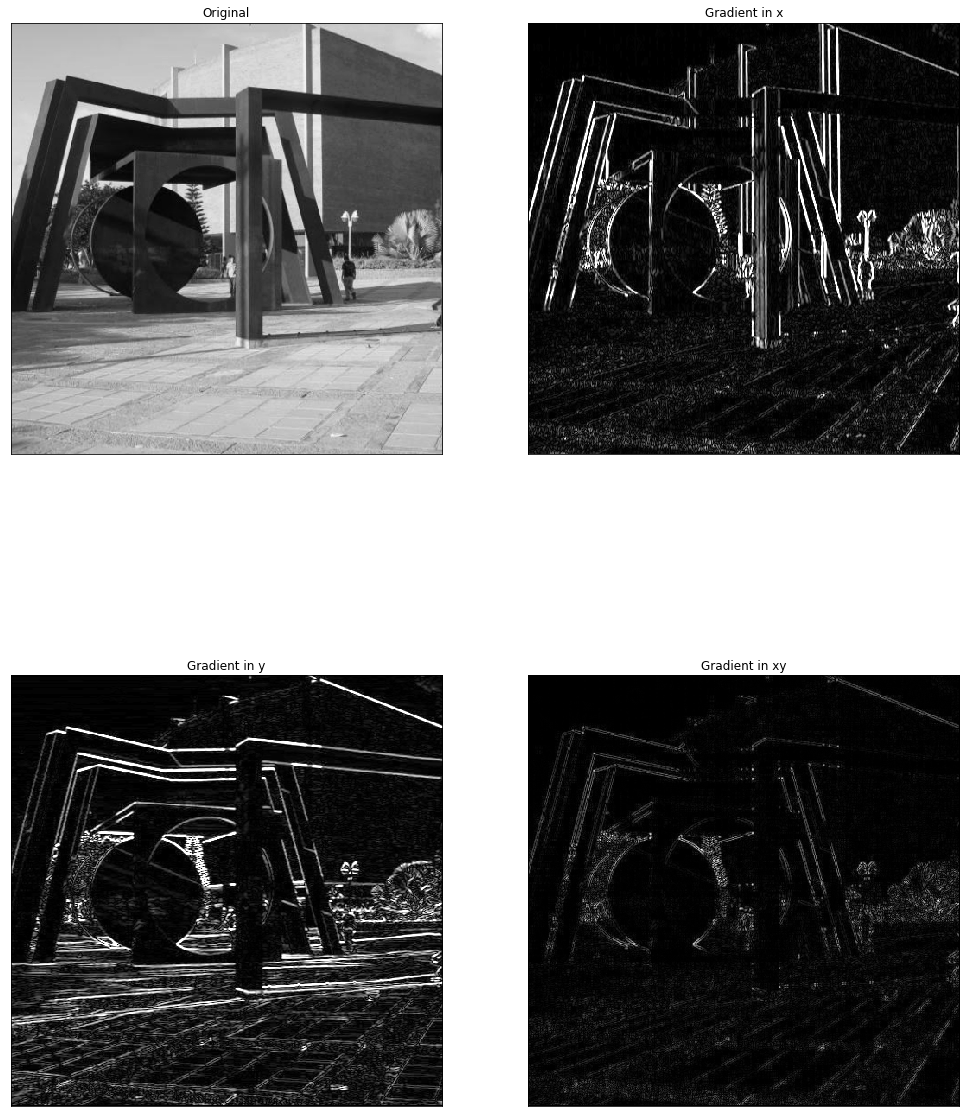

In [7]:
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
abs_grad_xy = cv.convertScaleAbs(grad_xy)

plt.figure(figsize=(17,22))
plt.subplot(221),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(abs_grad_x, cmap='gray'),plt.title('Gradient in x')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(abs_grad_y, cmap='gray'),plt.title('Gradient in y')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(abs_grad_xy, cmap='gray'),plt.title('Gradient in xy')
plt.xticks([]), plt.yticks([])
plt.show()  

Implement prewitt

# Median Filter

- Implement the filter by hand!

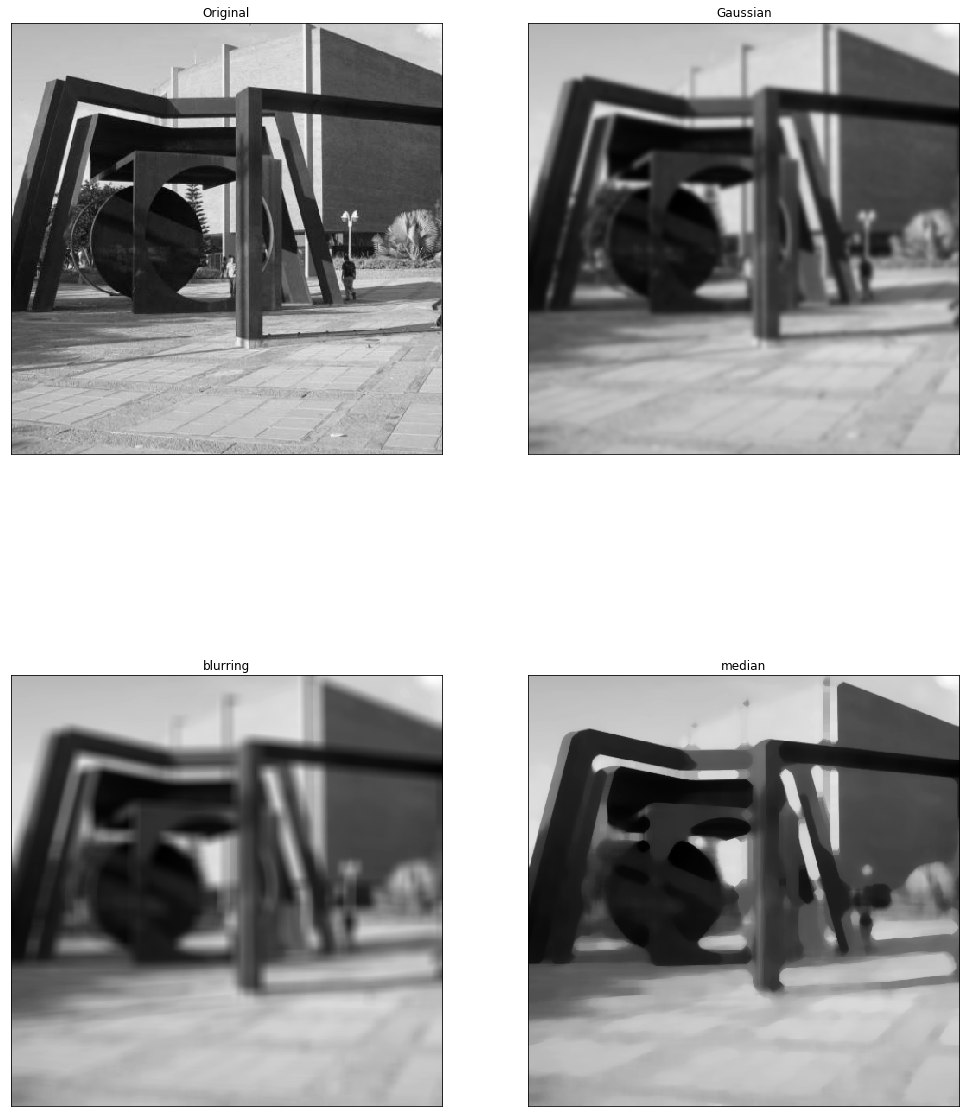

In [8]:
size_kernel = 15
Gaussian = cv.GaussianBlur(img,(size_kernel,size_kernel),0)
blur = cv.blur(img,(size_kernel,size_kernel))
median = cv.medianBlur(img,size_kernel)

plt.figure(figsize=(17,22))
plt.subplot(221),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(Gaussian, cmap='gray'),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(blur, cmap='gray'),plt.title('blurring')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median, cmap='gray'),plt.title('median')
plt.xticks([]), plt.yticks([])
plt.show()

- What about other filters??...Try to read and implement a new filter and explain a possible use!
- Propose a new filter!

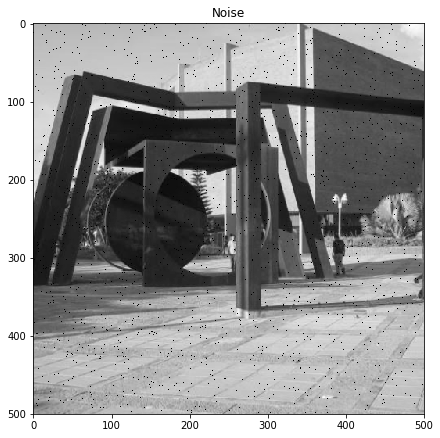

In [9]:
row,col = img.shape
p = 0.5
a = 0.01
noisy = img
# Salt mode
num_salt = np.ceil(a * img.size * p)
coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]
noisy[coords] = 1
# Pepper mode
num_pepper = np.ceil(a * img.size * (1. - p))
coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
noisy[coords] = 0

plt.figure(figsize=(7,12))
plt.imshow(img,cmap='gray'), plt.title('Noise');

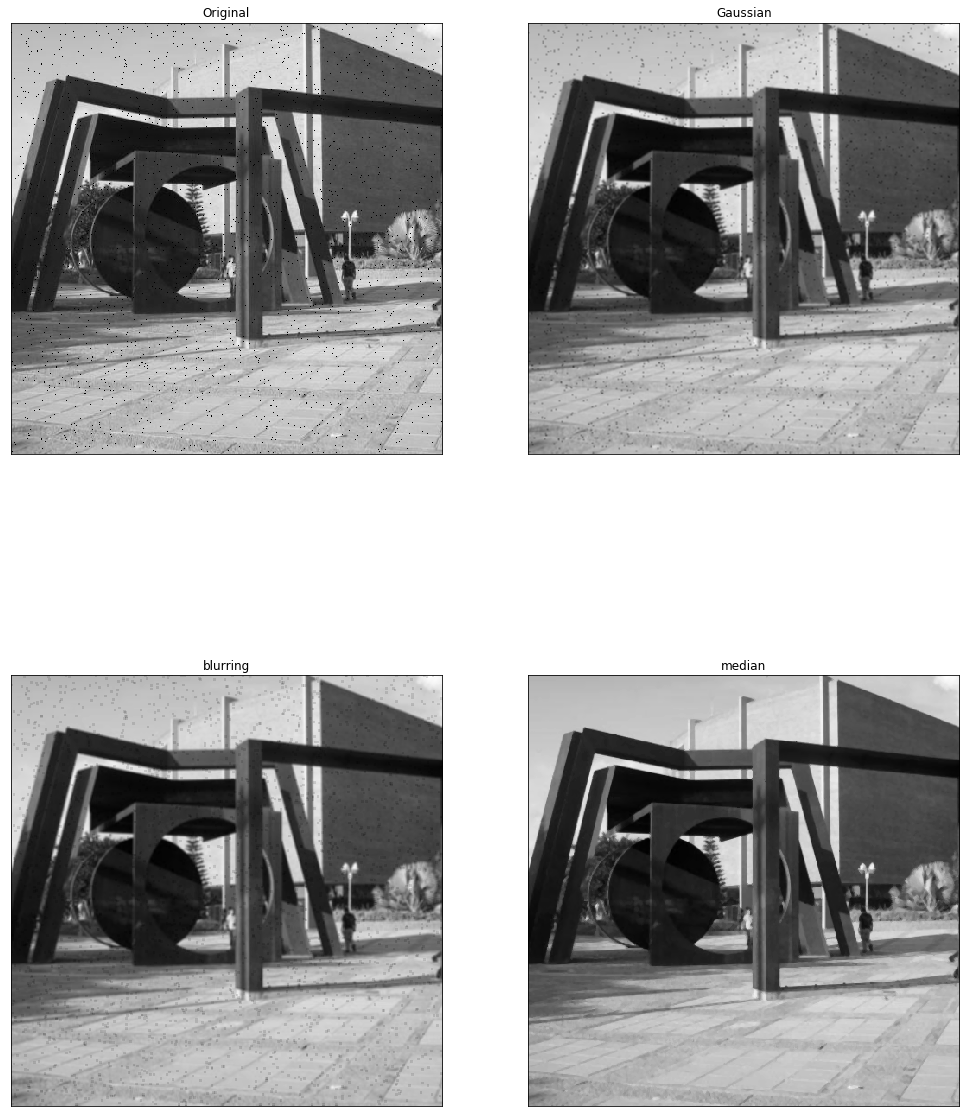

In [11]:
size_kernel = 3
Gaussian = cv.GaussianBlur(img,(size_kernel,size_kernel),0)
blur = cv.blur(img,(size_kernel,size_kernel))
median = cv.medianBlur(img,size_kernel)

plt.figure(figsize=(17,22))
plt.subplot(221),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(Gaussian, cmap='gray'),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(blur, cmap='gray'),plt.title('blurring')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median, cmap='gray'),plt.title('median')
plt.xticks([]), plt.yticks([])
plt.show()